# MINI PROJET

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def AIO(t,b,ld,mu,h,N):
    return np.array([-b*t[1]*t[0],b*t[1]*t[0]-t[1]/ld-mu*t[1],t[1]/ld])

In [3]:
import ipywidgets as widgets 
b1=widgets.FloatSlider(value=0.8,min=0,max=1,step=0.1,description='S0')
b2=widgets.FloatSlider(value=0.2,min=0,max=1,step=0.1,description='I0')
b3=widgets.IntSlider(value=30,min=10,max=100,step=10,description='N')
b4=widgets.FloatSlider(value=0.1,min=0,max=1,step=0.1,description='beta')
b5=widgets.IntSlider(value=5,min=5,max=30,step=1,description='lambda')
b6=widgets.FloatSlider(value=0.01,min=0,max=0.1,step=0.01,description='mu')

In [4]:
b1

FloatSlider(value=0.8, description='S0', max=1.0)

In [5]:
b2

FloatSlider(value=0.2, description='I0', max=1.0)

In [6]:
b3

IntSlider(value=30, description='N', min=10, step=10)

In [7]:
b4

FloatSlider(value=0.1, description='beta', max=1.0)

In [8]:
b5

IntSlider(value=5, description='lambda', max=30, min=5)

In [9]:
b6

FloatSlider(value=0.01, description='mu', max=0.1, step=0.01)

In [16]:
#Parametres d'initialisation : 
# Veuillez choisir vos valeurs sur les sliders
T=30
N=b3.value
h=T/N
S=np.zeros(N);S[0]=b1.value
I=np.zeros(N);I[0]=b2.value
R=np.zeros(N);R[0]=0
b=b4.value
ld=b5.value
mu=b6.value

## EULER EXPLICITE

In [17]:
def euler_exp(S,I,R,b,ld,mu,h,N):
    for i in range(1,N):
        tmp1=np.array([S[i-1],I[i-1],R[i-1]])
        S[i],I[i],R[i]=tmp1+h*AIO(tmp1,b,ld,mu,h,N)
    return S,I,R

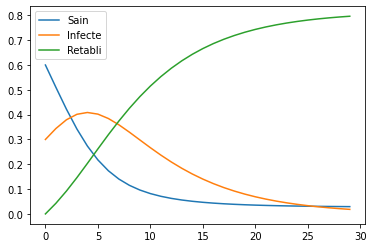

In [18]:
S,I,R=euler_exp(S,I,R,b,ld,mu,h,N)
fig, ax = plt.subplots()
ax.plot( S, label='Sain')
ax.plot( I, label='Infecte')
ax.plot( R, label='Retabli')
leg = ax.legend();

## EULER IMPLICITE

In [13]:
def Fi(b,ld,mu,I,S):
    return b*I*S-I/ld-mu*I

In [14]:
def pt_fixe(S0,I0,b,ld,mu,h):
    y=I0
    for i in range (1000):
        y=I0+h*Fi(b,ld,mu,y,S0/(1+h*b*y))
    return y

In [15]:
def euler_imp(S,I,R,b,ld,mu,h,N):
    for i in range(0,N-1):
        I[i+1]=pt_fixe(S[i],I[i],b,ld,mu,h)
        S[i+1]=S[i]-h*b*I[i+1]*(S[i]/(1+h*b*I[i-1]))
        R[i+1]=R[i]+(h*I[i+1])/ld
    return I,S,R

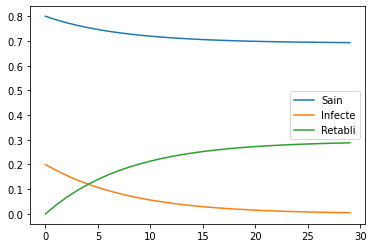

In [16]:
I,S,R=euler_imp(S,I,R,b,ld,mu,h,N)
fig, ax = plt.subplots()
ax.plot( S, label='Sain')
ax.plot( I, label='Infecte')
ax.plot( R, label='Retabli')
leg = ax.legend();

## HEUN

In [17]:
def Heun(S,I,R,b,ld,mu,h,N):
    for i in range (1,N):
        tmp1=np.array([S[i-1],I[i-1],R[i-1]])
        tmp2=tmp1+h*AIO(tmp1,b,ld,mu,h,N)
        S[i],I[i],R[i]=tmp1+(h/2)*(AIO(tmp1,b,ld,mu,h,N)+AIO(tmp2,b,ld,mu,h,N))
        return S,I,R

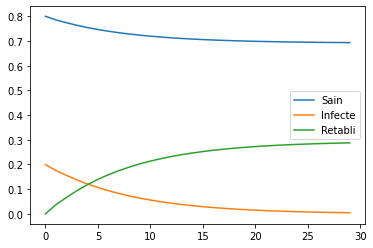

In [18]:
S,I,R=Heun(S,I,R,b,ld,mu,h,N)
fig, ax = plt.subplots()
ax.plot( S, label='Sain')
ax.plot( I, label='Infecte')
ax.plot( R, label='Retabli')
leg = ax.legend();

## RUNGE KUNTA 4

In [19]:
def runge_kutta4(S,I,R,b,ld,mu,h,N):
    for i in range (1,N):
        tmp1=np.array([S[i-1],I[i-1],R[i-1]])
        tmp2=tmp1+(h/2)*AIO(tmp1,b,ld,mu,h,N)
        tmp3=tmp1+(h/2)*AIO(tmp2,b,ld,mu,h,N)
        tmp4=tmp1+(h/2)*AIO(tmp3,b,ld,mu,h,N)
        S[i],I[i],R[i]=tmp1+(h/6)*(AIO(tmp1,b,ld,mu,h,N)+2*AIO(tmp2,b,ld,mu,h,N)+2*AIO(tmp3,b,ld,mu,h,N)+AIO(tmp4,b,ld,mu,h,N))
    return S,I,R


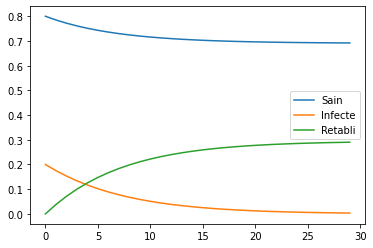

In [20]:
S,I,R=runge_kutta4(S,I,R,b,ld,mu,h,N)
fig, ax = plt.subplots()
ax.plot( S, label='Sain')
ax.plot( I, label='Infecte')
ax.plot( R, label='Retabli')
leg = ax.legend();